## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, We will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

As we work through the project, and we can feel more confident in our final submission meeting the criteria.  As a final check, assure we meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [342]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [343]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [344]:
# Find number of rows in the dataset.

num_row = df.shape[0]
print("{} rows in the dataset.".format(num_row))

294478 rows in the dataset.


c. The number of unique users in the dataset.

In [345]:
# Find unique users in the dataset.

num_id = df.nunique()['user_id']
print("{} unique users in the dataset.".format(num_id))

290584 unique users in the dataset.


d. The proportion of users converted.

In [346]:
# Find users converted propertion

print("{} is the proportion of users converted.".format(df['converted'].mean()))

0.11965919355605512 is the proportion of users converted.


e. The number of times the `new_page` and `treatment` don't line up.

In [347]:
# Find the new_page and 
df_lineup = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')") 
print("{} times the new_page and treatment don't line up.".format((df_lineup.shape[0]) ))


3893 times the new_page and treatment don't line up.


f. Do any of the rows have missing values?

In [348]:
# To check missing value and any rows in csv file 
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`Observation.` **In the above question we have :**<br>
`1.` **294478 rows in the dataset.**<br>
`2.` **290584 unique users in the dataset.**<br>
`3.` **0.11965919355605512 is the proportion of users converted.**<br>
`4.` **3893 times the new_page and treatment don't line up.**<br>
`5.`  **We don't have and missing row values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [349]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [473]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [351]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [475]:
# to find unique user_id
print("{} is unique user_id are in dataset df2.".format(df2['user_id'].nunique()))

290584 is unique user_id are in dataset df2.


b. There is one **user_id** repeated in **df2**.  What is it?

In [353]:
# To find duplicate user_id
sum(df2['user_id'].duplicated())
print("only {} user_id duplicated in df2".format(sum(df2['user_id'].duplicated())))

# To find repeated user_id
df_rep = df2[df2.duplicated(['user_id'])]['user_id'].unique()
print("{} is the repeated user_id in df2 ".format(df_rep))

only 1 user_id duplicated in df2
[773192] is the repeated user_id in df2 


c. What is the row information for the repeat **user_id**? 

In [354]:
# Information of duplicate row user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [355]:
# Remove Dublicate user_id but keep data frame df2
df2 = df2.drop_duplicates(['user_id'], keep='first')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`Observation :` **After solve the above question we have :** **290584** of unique ids in df2. **773192** user_id for non_unique id in df2. The landing_page for the non-unique id is **new_page**. The group for the non-unique id is **treatment**. The user_id for the non-unique id in df2 is **773192** And the value of converted column for the non-unique id is **0**













`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [356]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [357]:
# for porability 
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [358]:
# Find the probability indiviual control group they converted

df_ctr = df2[df2['group'] == 'control']['converted'].mean()
print("{} is the probability they converted.Thus, given that an individual was in the control group.".format(df_ctr))

0.1203863045004612 is the probability they converted.Thus, given that an individual was in the control group.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [359]:
# Find the probability indiviual treatment group they converted
df_treat= df2[df2['group'] == 'treatment']['converted'].mean()
print("{} is the probability they converted.Thus, given that an individual was in the treatment group.".format(df_treat))

0.11880806551510564 is the probability they converted.Thus, given that an individual was in the treatment group.


d. What is the probability that an individual received the new page?

In [484]:
# find indiviual probabilty recievd new_page
df_page1 = len(df2.query("landing_page == 'new_page'")) / df2.shape[0]
print("{} is the probability that an individual received the new page.".format(df_page1))

0.5000619442226688 is the probability that an individual received the new page.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Observation that new treatment page leads to more conversion **
    `1.` 11.96% Probability of converting regardless of page.
    `2.` 12.04% probability of converting,Given an individual received the control page.
    `3.` 11.88% probability of converting,Given that an individual received the treatment.
    `4.` 50.01% probability of receiving the new page.That means a very minute difference betweeen new_page and 
         old_page conversion so that it hard to make a conclusion beacuse both page have similar performace.If the size of user increase it will be helpfull to explain easily which one is more conversions.
      


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis**

$$H_0: p_{new} <= p_{old} $$


**Alternative Hypothesis **

$$H_1: p_{new} > p_{old} $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [443]:
# To find convert rate for p_new
p_new = df2['converted'].mean()
print("{} is the convert rate for  Pnew under the null.".format(p_new))

0.11959708724499628 is the convert rate for  Pnew under the null.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [444]:
# To find convert rate for p_old 
p_old = df2['converted'].mean()
print("{} is the convert rate for Pold under the null.".format(p_old))

0.11959708724499628 is the convert rate for Pold under the null.


c. What is $n_{new}$?

In [445]:
#To find value of n_new
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [446]:
# To find value of n_old
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [366]:
# using numpy.random.choice(a, size=None, replace=True, p=None) we take output 
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

print(new_page_converted)

[0 0 0 ... 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [367]:
# Value of old_page_converted
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print(old_page_converted)

[0 0 0 ... 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [368]:
# To find  pnew  -  pold  for your simulated values from part (e) and (f).
p_diff = new_page_converted.mean() - old_page_converted.mean()
print("{} is simulated value of pnew - pold".format(p_diff))

-0.0009383030107771584 is simulated value of pnew - pold


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [447]:
# to store all 10,000 values in a p_diffs (numpy array )
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

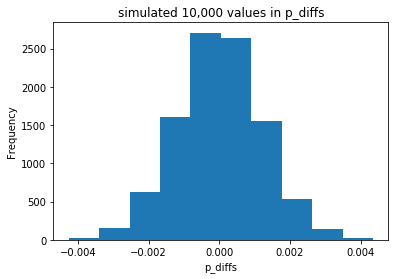

In [451]:
# plot null distribution
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulated 10,000 values in p_diffs');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [371]:
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print("{} is the actual difference observed in ab_data.csv. ".format(act_diff))
# Find p_diffs are greater than the actual difference observed

p_diffs = np.array(p_diffs)
print("{} is the proportion of the p_diffs are greater than the actual difference .".format((act_diff < p_diffs).mean()))
                                                                                                                    
                                                                                                                    
                                                                                                                    

-0.0015782389853555567 is the actual difference observed in ab_data.csv. 
0.9019 is the proportion of the p_diffs are greater than the actual difference .


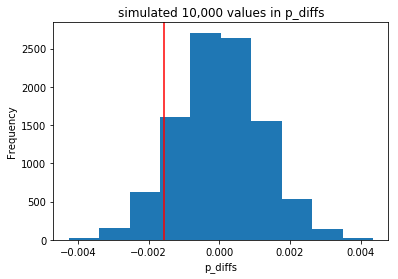

In [452]:
# plot null distribution
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulated 10,000 values in p_diffs');

# plot line for observed statistic
plt.axvline(x=act_diff,color ='red')

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Observation :** **The value calculated above is the p-value.**
we calculate that almost 90% of the population in our simulated sample lies above the actual difference.Here, we find that there is no conversion advantage with new pages. We conclude that null hypothesis is true as old and new pages perform almost similarly. Old pages, as the numbers show, performed slightly better.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [372]:
df2.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [373]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))   # Or We can also use above  Q2(d) n_old value 
n_new = len(df2.query("group == 'treatment'")) # Or We can also use above  Q2(c) n_new value 
print("{} value of convert_old.\n{} value of convert_new.".format(convert_old,convert_new))
print("{} value of n_old.\n{} value of n_new.".format(n_old,n_new))

17489 value of convert_old.
17264 value of convert_new.
145274 value of n_old.
145310 value of n_new.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [374]:
# Using proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print( "z_score: {} \np_value: {} ".format(z_score, p_value))


z_score: 1.3109241984234394 
p_value: 0.9050583127590245 


In [375]:
from scipy.stats import norm
# how significant our z-score is
print(norm.cdf(z_score))

# what our critical value at 95% confidence is
print(norm.ppf(1-(0.05/2)))


0.9050583127590245
1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Observation :** Since the **z-score of 1.3109241984234394**  exceeds the **critical value of 1.959963984540054 .** 

Spoken plainly, **old_page(convert_old/n_old =.1203863)** is statistically different and better than **new_page(convert_new/n_new = 0.1188080)**.We would expect their long-term performance to be different from one another.But we fail to reject the null hypothesis that suggest the new_page conversion rate is higher than the old_page rate.yes, we agree with the findings in parts j. and k.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We use **Logistic Regression** beacuse logistic regression is a regression approach used to predict only two outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [376]:
# Sample Format,How we further use intercept
"""import statsmodels.api as sms
df['intercept'] = 1
log_mod = sm.Logit(df['XY'], df[['intercept', 'xx1', 'xx2']])
results = log_mod.fit()
results.summary()"""

"import statsmodels.api as sms\ndf['intercept'] = 1\nlog_mod = sm.Logit(df['XY'], df[['intercept', 'xx1', 'xx2']])\nresults = log_mod.fit()\nresults.summary()"

In [377]:
import statsmodels.api as sm

# To create a column for the intercept
df2['intercept'] = 1

# To create a dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

#df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])


In [378]:
# To check wheather our dummy variables are create or not
df2.tail(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [379]:
log_mod = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [380]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-14 11:46 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Observation :** The p-value associated with ab_page is **0.1899 or 0.190 or 19% **.<br> In **Part II** observation we find old_page is better than new_page.If new_page proves tobe better at a **Type I error of 0.05** so we consider that new_page is better.
<br>
In **Part III we observe question c to e** we find that Null Hypothesis($H_0$) in this 'ab_page' is failed to predicting the responses and we failed to reject Null Hypothesis($H_0$) because it turned out it's probability is aprox 19%. Again, it seems there is no difference whether we use or not new_page.So we stick on old_page



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Observation :** We should consider other factors that might influence whether or not an individual converts.**For example** we should catogaries user segments like Students,employee,employer,businessman etc. that might create a change aversion or even, the opposite as a predisposition to conversion.Others we used ***Timestamps** factor in which we categories data according to month,year and weeek where is good conversion.We consider Age factors may be good for conversions.<br>
The main **disadvantages** is adding new terms into regression model  is that in additional factors we can never account for all influencing factors or accomodate them.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [381]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [455]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [468]:
# To know the value of country count
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [464]:
# Create the necessary dummy variables
df_new[['US','UK']] = pd.get_dummies(df_new['country'])[['US','UK']]
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [470]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1

log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','US', 'UK']])

results = log_mod2.fit()

results.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-14 19:39 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [471]:
# Calculate the exponential of all elements in the input array.
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

In [469]:
### 


In [463]:
1/_

0.00010001000100010001

**Observation :** As we find in logistic regression model that there is no meaningful interaction between 'ab_page' and 'country(US,UK)' because 
**coef. of 'ab_page' is -0.0149** doesn't change and **coef. of 'country(.0408,0.0506)'**.The P-values of 'ab_page' is 0.1912 and country US is 0.1295,CA is 0.0745 are consider negligible,Thus we failed to regect the null hyphothesis in which conversion have no siginficant relationship with landing_page or country.
 





<a id='conclusions'></a>
## Conclusions

In the end ,we get computed result by different methods.
we only concluide  that performace of **old_page is better than new_page (by minute value only or little difference)**.Hence, we accept the Null Hypothesis($H_0$) and Reject the Alternate Hypothesis(($H_1$).
These presumption are based on data provided by company. This analysis acknowledges its limitations due to some factors not included in the data.

### References
`1.` https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html<br>
`2.` Udacity Logistic regression and A/B test case study and Hypothesis testing<br>
`3.` http://knowledgetack.com/python/statsmodels/proportions_ztest/<br>
`4.` https://www.statsmodels.org/stable/index.html<br>


In [472]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255